In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [42]:
# Load the dataset
dataset_path = '/kaggle/input/path/to/your/dataset.csv'
df = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [43]:
print(df.head())

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB
None


In [45]:
df.shape

(372450, 785)

In [46]:
print(df.describe())

                   0       0.1       0.2       0.3       0.4       0.5  \
count  372450.000000  372450.0  372450.0  372450.0  372450.0  372450.0   
mean       13.523490       0.0       0.0       0.0       0.0       0.0   
std         6.740824       0.0       0.0       0.0       0.0       0.0   
min         0.000000       0.0       0.0       0.0       0.0       0.0   
25%        10.000000       0.0       0.0       0.0       0.0       0.0   
50%        14.000000       0.0       0.0       0.0       0.0       0.0   
75%        18.000000       0.0       0.0       0.0       0.0       0.0   
max        25.000000       0.0       0.0       0.0       0.0       0.0   

            0.6       0.7       0.8       0.9  ...          0.639  \
count  372450.0  372450.0  372450.0  372450.0  ...  372450.000000   
mean        0.0       0.0       0.0       0.0  ...       0.001616   
std         0.0       0.0       0.0       0.0  ...       0.490788   
min         0.0       0.0       0.0       0.0  ...       

    Data Preprocessing:
        Handle any missing values, outliers, or noise in the dataset.
        Convert the image data into a format suitable for machine learning models. This may involve reshaping or flattening the images.

In [47]:
df_copy = df.copy()

In [48]:
df_copy.rename(columns = {'0': 'label'}, inplace = True)
df_copy.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_count = df_copy.label.value_counts()
df_count

label
14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: count, dtype: int64

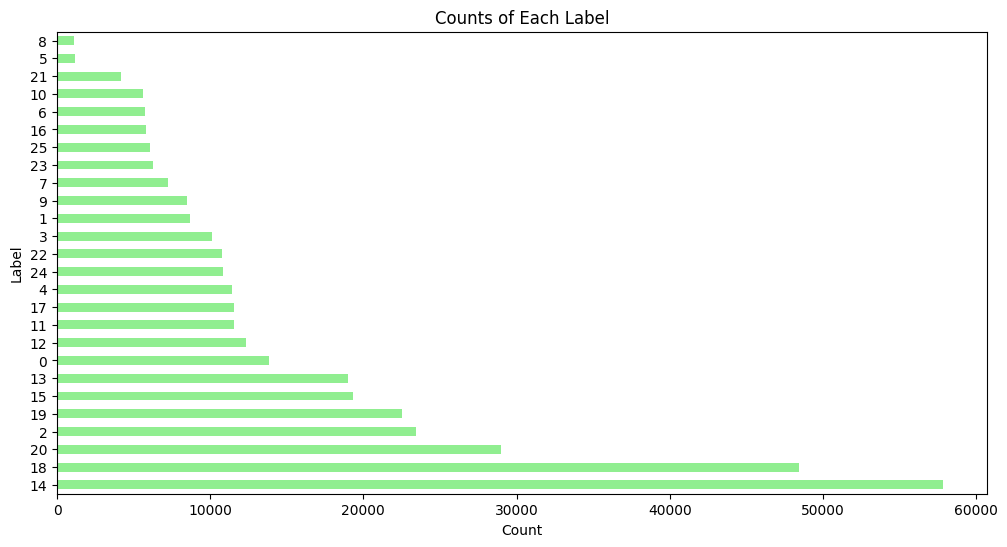

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df_count.plot(kind='barh', color='lightgreen')  # Change 'lightgreen' to your desired color

plt.title('Counts of Each Label')
plt.xlabel('Count')
plt.ylabel('Label')

plt.show()

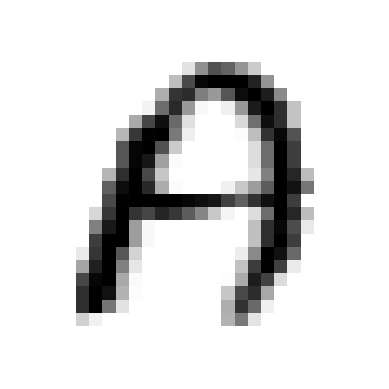

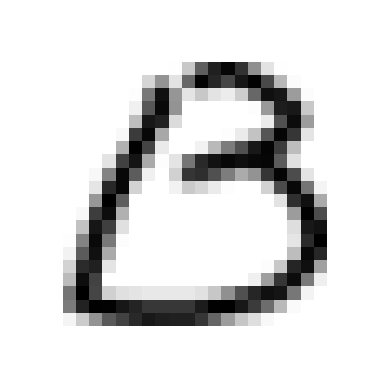

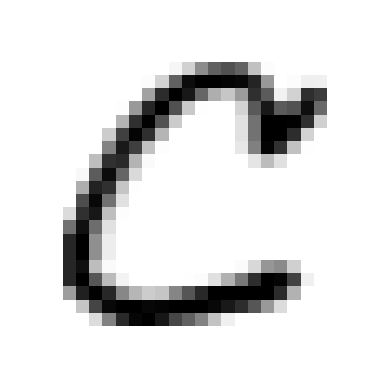

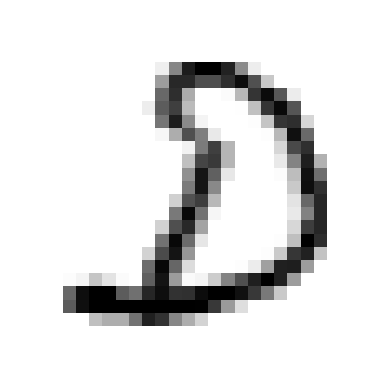

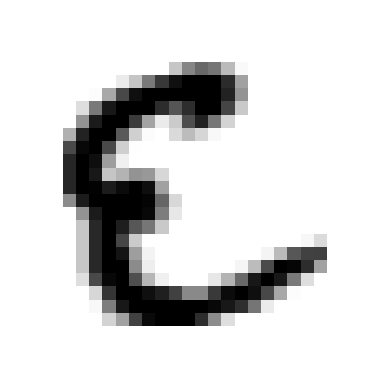

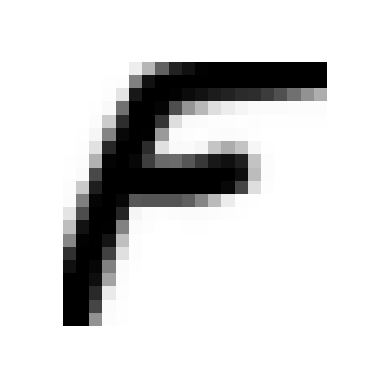

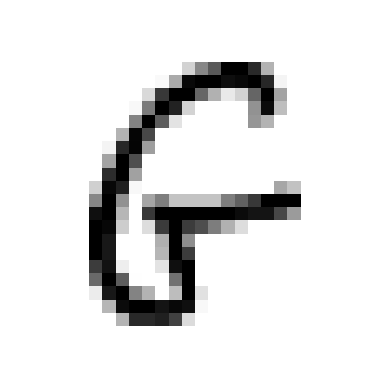

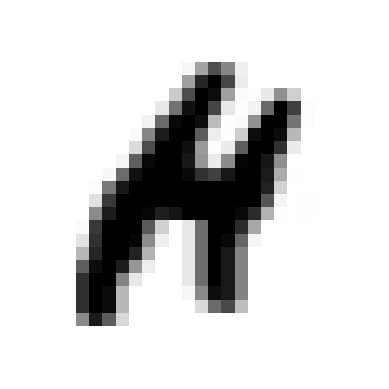

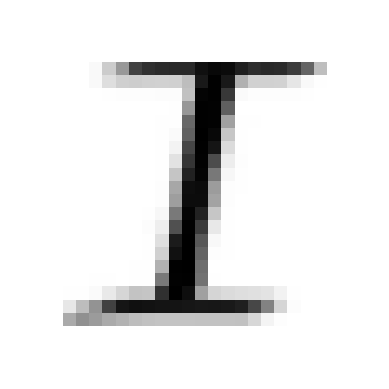

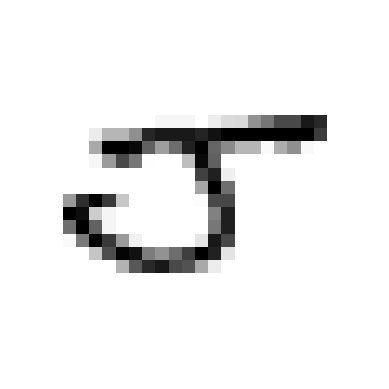

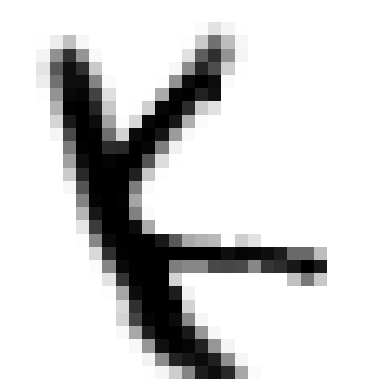

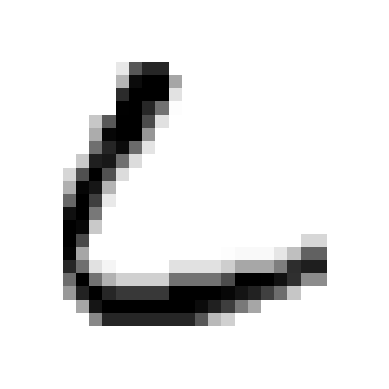

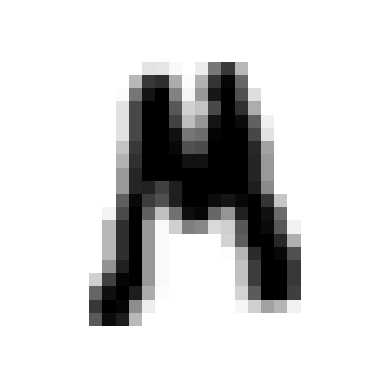

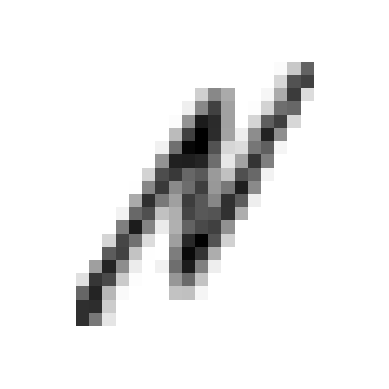

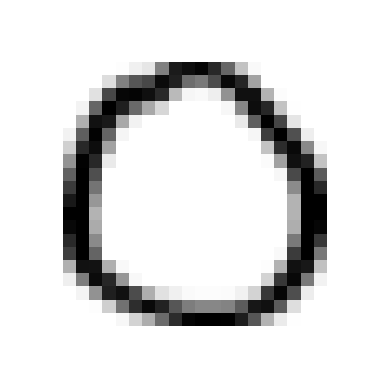

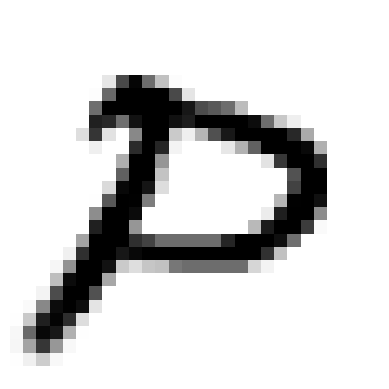

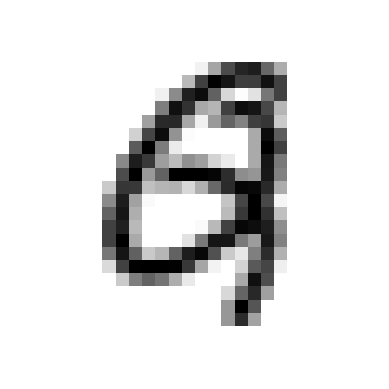

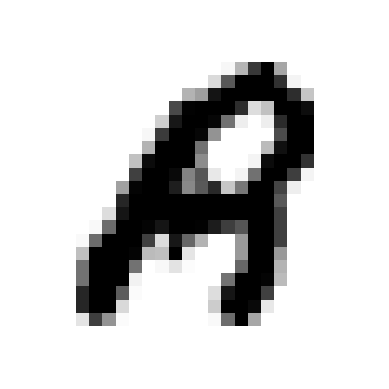

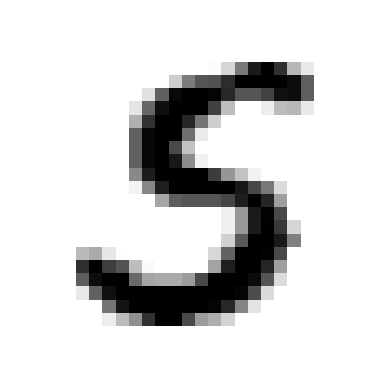

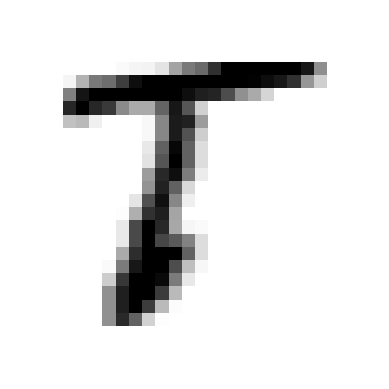

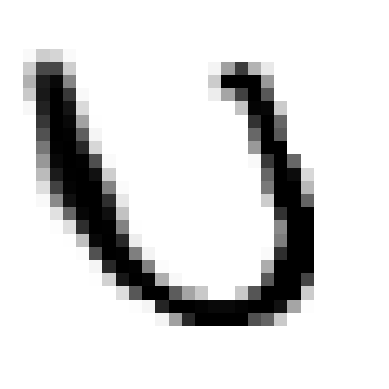

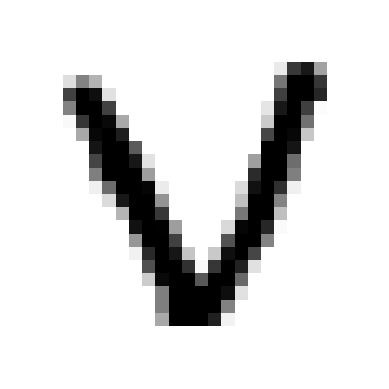

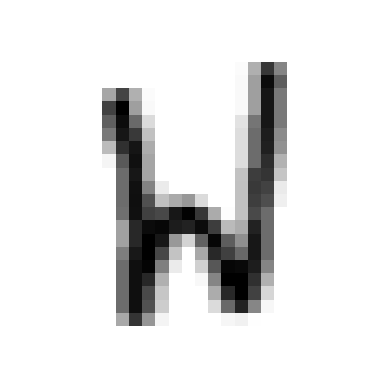

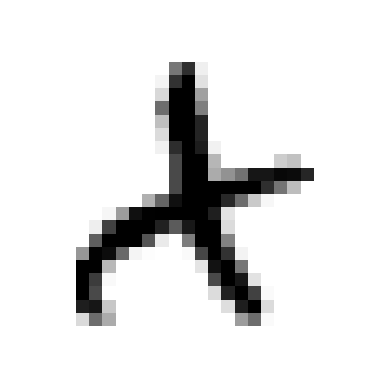

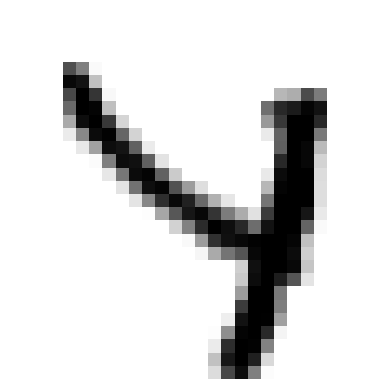

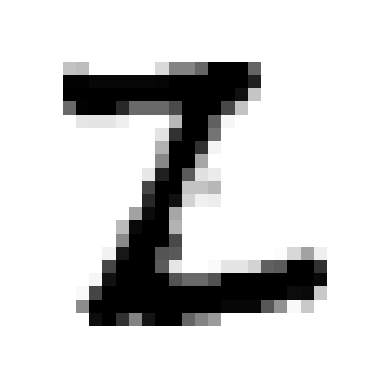

In [27]:
for i in range(26):
    dd = df_copy[df_copy['label']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    plt.imshow(x, cmap='binary')
    plt.axis('off')
    plt.show()

In [51]:
y = df_copy['label']
X = df_copy.drop(columns = ['label'])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 42, stratify= y)

In [53]:
'''
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#t-SNE object
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

#Reduce the sample size for t-SNE computation
sample_size = 100000
X_train_sample = X_train.sample(n=sample_size, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_sample)

# Visualize
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Handwritten Alphabets')
plt.colorbar()
plt.show()
'''

"\nfrom sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\n#t-SNE object\ntsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)\n\n#Reduce the sample size for t-SNE computation\nsample_size = 100000\nX_train_sample = X_train.sample(n=sample_size, random_state=42)\nX_train_tsne = tsne.fit_transform(X_train_sample)\n\n# Visualize\nplt.figure(figsize=(10, 8))\nplt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)\nplt.title('t-SNE Visualization of Handwritten Alphabets')\nplt.colorbar()\nplt.show()\n"

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#t-SNE object
tsne = TSNE(n_components=2, random_state=42)
X_transformed = tsne.fit_transform(X[:30000])

In [55]:
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'label'], data=np.column_stack((X_transformed, y.iloc[:30000])))
cps_df.loc[:, 'label'] = cps_df.label.astype(int)
cps_df.head()

,CP1,CP2,label
0,-35.898426,15.658481,0.0
1,-42.880161,-30.855377,0.0
2,0.454526,-17.165634,0.0
3,-23.613836,-36.346550,0.0
4,-60.781372,63.796425,0.0


In [56]:
alphabet_map = {
               0: 'A',
               1: 'B',
               2: 'C',
               3: 'D',
               4: 'E',
               5: 'F',
               6: 'G',
               7: 'H',
               8: 'I',
               9: 'J',
               10: 'K',
               11: 'L',
               12: 'M',
               13: 'N',
               14: 'O',
               15: 'P',
               16: 'Q',
               17: 'R',
               18: 'S',
               19: 'T',
               20: 'U',
               21: 'V',
               22: 'W',
               23: 'X',
               24: 'Y',
               25: 'Z',
               }
cps_df.loc[:, 'label'] = cps_df.label.map(alphabet_map)

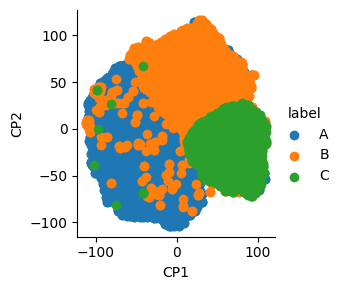

In [57]:
grid = sns.FacetGrid(cps_df, hue="label")
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

In [58]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#t-SNE object
tsne = TSNE(n_components=2, random_state=42)
X_transformed = tsne.fit_transform(X[:40000])

In [60]:
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'label'], data=np.column_stack((X_transformed, y.iloc[:40000])))
cps_df.loc[:, 'label'] = cps_df.label.astype(int)
cps_df.head()

,CP1,CP2,label
0,50.320221,13.154886,0.0
1,57.040668,-30.890785,0.0
2,20.911942,-14.970453,0.0
3,39.843796,-37.954582,0.0
4,79.046776,59.178444,0.0


In [61]:
alphabet_map = {
               0: 'A',
               1: 'B',
               2: 'C',
               3: 'D',
               4: 'E',
               5: 'F',
               6: 'G',
               7: 'H',
               8: 'I',
               9: 'J',
               10: 'K',
               11: 'L',
               12: 'M',
               13: 'N',
               14: 'O',
               15: 'P',
               16: 'Q',
               17: 'R',
               18: 'S',
               19: 'T',
               20: 'U',
               21: 'V',
               22: 'W',
               23: 'X',
               24: 'Y',
               25: 'Z',
               }
cps_df.loc[:, 'label'] = cps_df.label.map(alphabet_map)

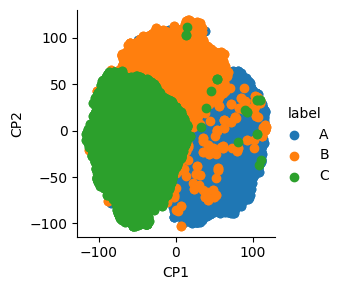

In [62]:
grid = sns.FacetGrid(cps_df, hue="label")
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

---------------------------